In [361]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [362]:
# Read the csv
diabetes_df = pd.read_csv ('../Project-4/diabetes_prediction_dataset.csv')
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [363]:
# Gather info about the dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [364]:
# Describe the dataset
diabetes_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# Are males or females more likely to develop diabetes?


In [365]:
# Change diabetes column from integer to boolean
diabetes_df['diabetes'] = diabetes_df['diabetes'].astype(bool)
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,False
1,Female,54.0,0,0,No Info,27.32,6.6,80,False
2,Male,28.0,0,0,never,27.32,5.7,158,False
3,Female,36.0,0,0,current,23.45,5.0,155,False
4,Male,76.0,1,1,current,20.14,4.8,155,False
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,False
99996,Female,2.0,0,0,No Info,17.37,6.5,100,False
99997,Male,66.0,0,0,former,27.83,5.7,155,False
99998,Female,24.0,0,0,never,35.42,4.0,100,False


In [366]:
# Diabetes by gender
# Females with Diabetes- 4461
# Males with Diabetes - 4039

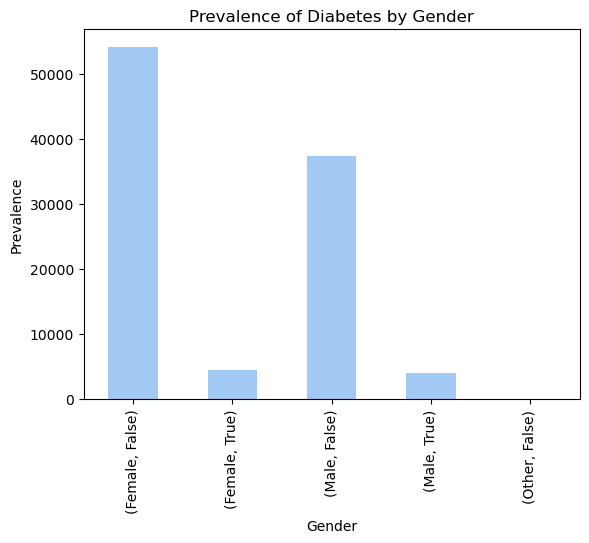

In [366]:
# # # Diabetes by gender
%matplotlib inline
sns.set_palette("pastel")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

diabetes_gender.plot(kind='bar', stacked=True)
plt.xlabel("Gender")
plt.ylabel("Prevalence")
plt.title("Prevalence of Diabetes by Gender")
plt.show()


# Does smoking increase someone's risk of developing diabetes?


<Axes: title={'center': 'Types of Smokers'}, ylabel='smoking_history'>

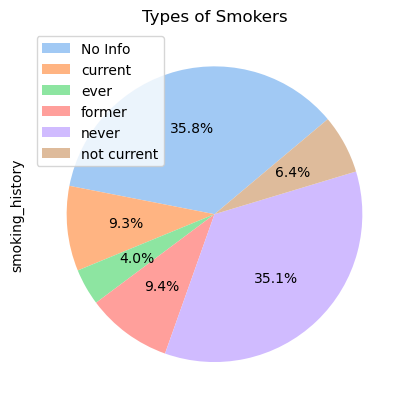

In [367]:
# Smoking history
diabetes_df.groupby("smoking_history").aggregate({"smoking_history":"count"}).plot(kind="pie", y="smoking_history", title="Types of Smokers", autopct="%.1f%%", labels=None, startangle=400)

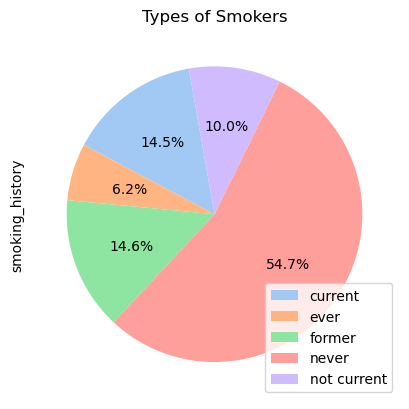

In [368]:
# Drop "No Info" from the pie chart for smoking history
diabetes_df = diabetes_df.replace('No Info', pd.NA)
diabetes_df.groupby("smoking_history").aggregate({"smoking_history":"count"}).plot(kind="pie", y="smoking_history", title="Types of Smokers", autopct="%.1f%%", startangle=100, labels=None)

# plt.savefig("Types of Smokers")

In [300]:
# Filter for those who currently smoke
smoking = diabetes_df.loc[diabetes_df["smoking_history"]=="current"]
smoking.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
3,Female,36.0,0,0,current,23.45,5.0,155,False
4,Male,76.0,1,1,current,20.14,4.8,155,False
20,Male,40.0,0,0,current,36.38,6.0,90,False
32,Female,41.0,0,0,current,22.01,6.2,126,False
38,Male,50.0,1,0,current,27.32,5.7,260,True


In [301]:
# Number of those that currently smoke
smoking.count()

gender                 9286
age                    9286
hypertension           9286
heart_disease          9286
smoking_history        9286
bmi                    9286
HbA1c_level            9286
blood_glucose_level    9286
diabetes               9286
dtype: int64

In [302]:
# Visualize those who currently smoke and those with Diabetes
contingency_table = pd.crosstab(diabetes_df['diabetes'], diabetes_df['smoking_history'])
contingency_table

smoking_history,current,ever,former,never,not current
diabetes,,,,,
False,8338,3532,7762,31749,5757
True,948,472,1590,3346,690


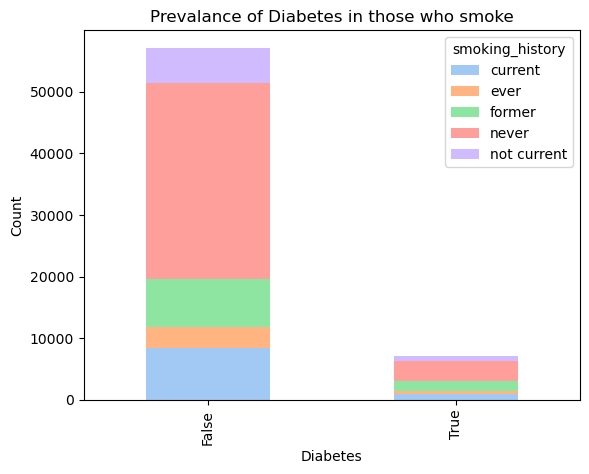

<Figure size 640x480 with 0 Axes>

In [369]:
# Prevelance of Diabetes in those who smoke
bar_graph = contingency_table.plot(kind='bar', stacked = True)
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.title("Prevalance of Diabetes in those who smoke")
plt.show()

# plt.savefig("Prevalance of Diabetes in those who smoke")

# Does Heart Disease increase someone's risk of developing Diabetes?

In [370]:
# Change heart_disease column from integer to boolean
diabetes_df['heart_disease'] = diabetes_df['heart_disease'].astype(bool)
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,True,never,25.19,6.6,140,False
1,Female,54.0,0,False,<NA>,27.32,6.6,80,False
2,Male,28.0,0,False,never,27.32,5.7,158,False
3,Female,36.0,0,False,current,23.45,5.0,155,False
4,Male,76.0,1,True,current,20.14,4.8,155,False
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,False,<NA>,27.32,6.2,90,False
99996,Female,2.0,0,False,<NA>,17.37,6.5,100,False
99997,Male,66.0,0,False,former,27.83,5.7,155,False
99998,Female,24.0,0,False,never,35.42,4.0,100,False


In [371]:
# Visualize those who currently smoke and those with Heart Disease
contingency_table_2 = pd.crosstab(diabetes_df['diabetes'], diabetes_df['heart_disease'])
contingency_table_2

heart_disease,False,True
diabetes,,
False,88825,2675
True,7233,1267


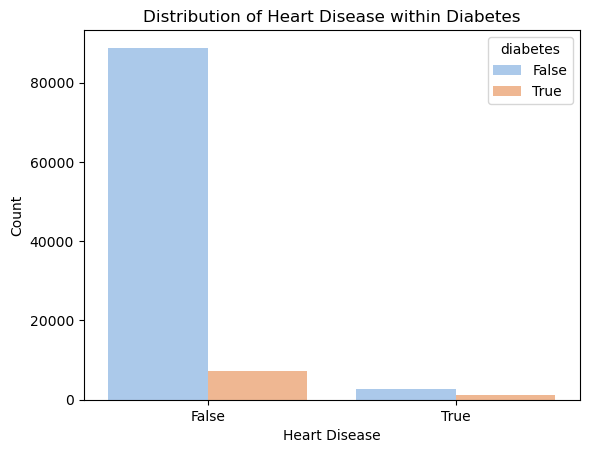

<Figure size 640x480 with 0 Axes>

In [372]:
# Distribution of HD within Diabetes
sns.countplot(x='heart_disease', hue = 'diabetes', data=diabetes_df)
plt.title("Distribution of Heart Disease within Diabetes")
plt.ylabel("Count")
plt.xlabel("Heart Disease")
plt.show()

# plt.savefig("Distribution of Heart Disease within Diabetes")

# Does Diabetes risk increase with age?

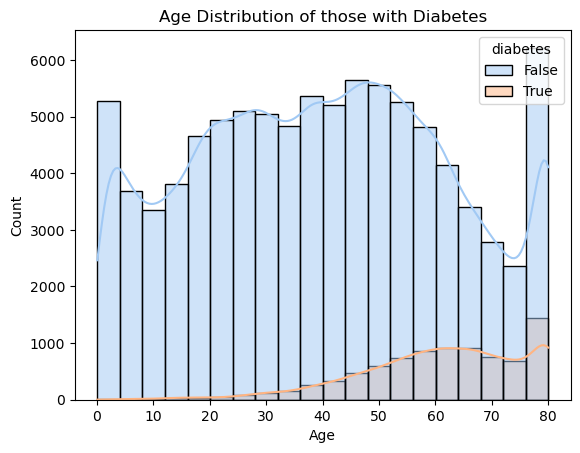

<Figure size 640x480 with 0 Axes>

In [373]:
# Diabetes by age groups
sns.histplot(data=diabetes_df, x='age', hue='diabetes',bins=20, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of those with Diabetes')
plt.show()

# plt.savefig("Age Distribution of those with Diabetes")

#Conclusion that Diabetes is more prevalent in the older population

# Does a higher BMI increase the liklehood of Diabetes?

Body Mass Index (BMI) is a person’s weight in kilograms divided by the square of height in meters. BMI is an inexpensive and easy screening method for weight category—underweight, healthy weight, overweight, and obesity.

BMI does not measure body fat directly, but BMI is moderately correlated with more direct measures of body fat 1,2,3. Furthermore, BMI appears to be as strongly correlated with various metabolic and disease outcome as are these more direct measures of body fatness

Below 18.5	Underweight
18.5 – 24.9	Healthy Weight
25.0 – 29.9	Overweight
30.0 and Above	Obesity

Resources: https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html#InterpretedAdults

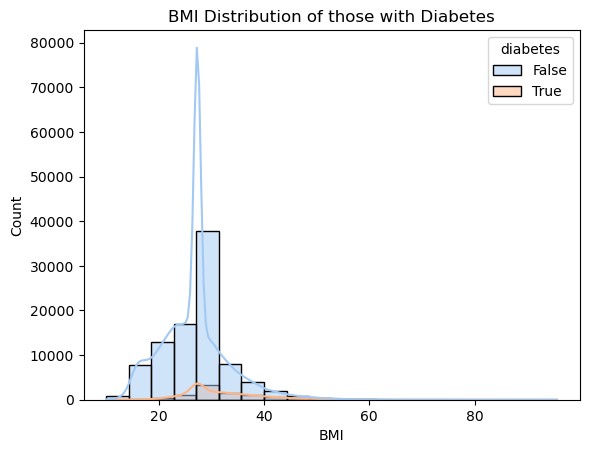

<Figure size 640x480 with 0 Axes>

In [374]:
# BMI distribution of those with Diabetes
sns.histplot(data=diabetes_df, x='bmi', hue='diabetes',bins=20, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('BMI Distribution of those with Diabetes')
plt.show()

# plt.savefig("BMI Distribution of those with Diabetes")


# HgA1c levels and diagnosing Diabetes

HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes.

Normal < 5.7
Prediabetic 5.7 - 6.4
Diabetic >= 6.5

Resource:
https://www.cdc.gov/diabetes/managing/managing-blood-sugar/a1c.html#:~:text=The%20A1C%20test%E2%80%94also%20known,care%20team%20manage%20your%20diabetes.

In [375]:
# Predicting Diabetes based on HgA1c levels for loop
diagnostic = []
for value in diabetes_df['HbA1c_level']:
    if value < 5.7:
        diagnostic.append('normal')
    elif (5.7 <= value) and (value <=6.4):
        diagnostic.append('prediabetes')
    elif (value >= 6.5):
        diagnostic.append('diabetes')
        
diabetes_df['diagnosis'] = diagnostic

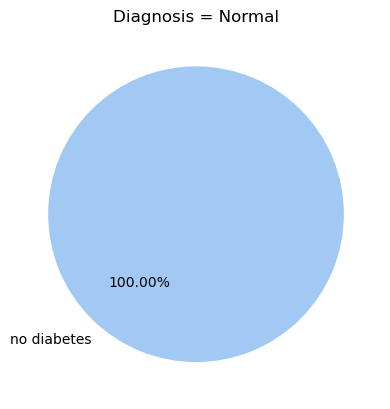

In [376]:
# Pie chart based on diagnostic criteria 
# Normal HgA1c levels

plt.pie(diabetes_df[diabetes_df['diagnosis'] == 'normal']['diabetes'].value_counts().values, 
        labels = ['no diabetes'],
        autopct='%1.2f%%', startangle = 50);
plt.title('Diagnosis = Normal')

# plt.savefig("Diabetes Diagnosis = Normal")

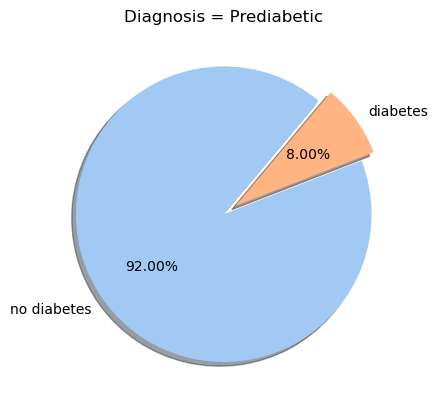

In [377]:
# Prediabetic HgA1c levels

plt.pie(diabetes_df[diabetes_df['diagnosis'] == 'prediabetes']['diabetes'].value_counts().values, 
        labels = ['no diabetes', 'diabetes'],
        autopct='%1.2f%%', startangle = 50, explode = [0, 0.1], shadow = True);
plt.title('Diagnosis = Prediabetic')

# plt.savefig("Diabetes Diagnosis = Prediabetic")

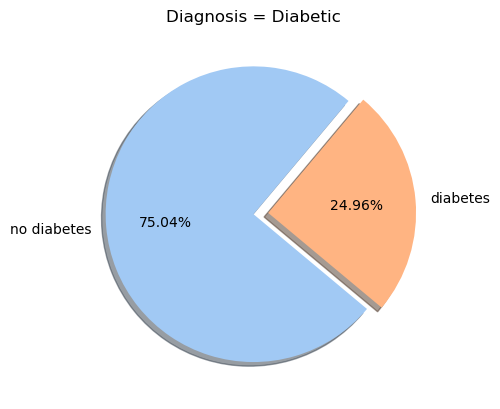

In [378]:
# Diabetic HgA1c levels

plt.pie(diabetes_df[diabetes_df['diagnosis'] == 'diabetes']['diabetes'].value_counts().values, 
        labels = ['no diabetes', 'diabetes'],
        autopct='%1.2f%%', startangle = 50,explode = [0, 0.1], shadow = True);
plt.title('Diagnosis = Diabetic')

# plt.savefig("Diabetes Diagnosis = Diabetic")